In [1]:
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import xarray as xr

In [4]:
import pandas as pd

## surface variables 

In [42]:
out_root = Path("/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data")
files = [f for f in out_root.glob("*surface_tidx*.npy")]
len(files)

60

(5, 13, 721, 1440)

In [10]:
sfc_nc = "/discover/nobackup/jli30/data/Aurora/2024-12-01-surface-level.nc"
ds = xr.open_dataset(sfc_nc)
ds

<xarray.Dataset> Size: 66MB
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 32B 2024-12-01 ... 2024-12-01T18:...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 64B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 17MB ...
    u10         (valid_time, latitude, longitude) float32 17MB ...
    v10         (valid_time, latitude, longitude) float32 17MB ...
    msl         (valid_time, latitude, longitude) float32 17MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-25T18:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds

In [43]:
start_time = "2024-12-01T06:00:00"
new_time_values = pd.date_range(start=start_time, periods=60, freq="6h")
new_time = xr.DataArray(new_time_values, dims=["time"], coords={"time": new_time_values})

In [44]:
lat = ds['latitude']
lon = ds['longitude']
variable_names =['msl', 'u10', 'v10', 't2m']

In [45]:
print(sorted(files))

[PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_01.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_02.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_03.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_04.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_05.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_06.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_surface_tidx_07.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src

In [46]:
np_arrays = [np.load(f) for f in sorted(files)]

In [47]:
stacked_data = np.stack(np_arrays, axis=0)
stacked_data.shape

(60, 4, 721, 1440)

In [48]:
new_ds = xr.Dataset()
for var_idx, var_name in enumerate(variable_names):
    new_ds[var_name] = xr.DataArray(
        stacked_data[:, var_idx, :, :],  # Extract corresponding variable data
        dims=["time", "latitude", "longitude"],
        coords={"time": new_time, "latitude": lat, "longitude": lon},
    )

In [49]:
new_ds

<xarray.Dataset> Size: 997MB
Dimensions:    (time: 60, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 480B 2024-12-01T06:00:00 ... 2024-12-16
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    msl        (time, latitude, longitude) float32 249MB 1.011e+05 ... 1.013e+05
    u10        (time, latitude, longitude) float32 249MB 0.4307 ... -0.3951
    v10        (time, latitude, longitude) float32 249MB 0.2842 ... -2.526
    t2m        (time, latitude, longitude) float32 249MB 251.1 250.9 ... 270.8

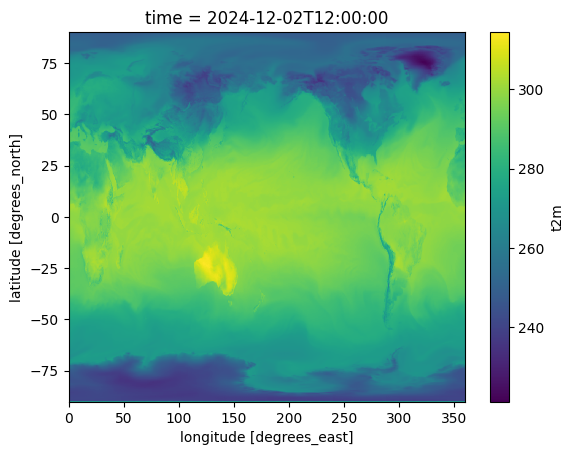

In [51]:
new_ds['t2m'].isel(time=5).plot()

In [52]:
new_ds.to_netcdf("/discover/nobackup/projects/QEFM/data/rollout_outputs/FMPangu/2024-12-01-surface-level-predicted-60-step.nc")

## atmospheric variables

In [5]:
out_root = Path("/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data")
files = [f for f in out_root.glob("*upper_tidx*.npy")]
len(files)

60

In [6]:
sfile = out_root / "output_upper.npy"
data = np.load(sfile)
data.shape

(5, 13, 721, 1440)

In [7]:
upper_nc = "/discover/nobackup/jli30/data/Aurora/2024-12-01-atmospheric.nc"
ds = xr.open_dataset(upper_nc)
ds

<xarray.Dataset> Size: 1GB
Dimensions:         (valid_time: 4, pressure_level: 13, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 32B 2024-12-01 ... 2024-12-01...
  * pressure_level  (pressure_level) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          (valid_time) <U4 64B ...
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 216MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 216MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 216MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 216MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 216MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-25T18:56 GRIB to CDM+CF via cfgrib-0.9.1...

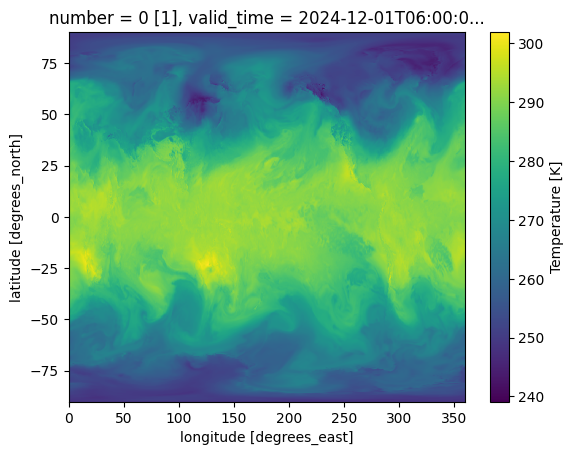

In [17]:
ds['t'].isel(valid_time=1, pressure_level=2).plot()

In [8]:
start_time = "2024-12-01T06:00:00"
new_time_values = pd.date_range(start=start_time, periods=60, freq="6h")


In [9]:
new_time = xr.DataArray(new_time_values, dims=["time"], coords={"time": new_time_values})

In [10]:
lat = ds['latitude']
lon = ds['longitude']
plev = ds['pressure_level']
variable_names =['z', 'q', 't', 'u', 'v']

In [11]:
print(sorted(files))

[PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_01.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_02.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_03.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_04.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_05.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_06.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data/output_upper_tidx_07.npy'), PosixPath('/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu

In [12]:
np_arrays = [np.load(f) for f in sorted(files)]

In [13]:
stacked_data = np.stack(np_arrays, axis=0)
stacked_data.shape

(60, 5, 13, 721, 1440)

In [14]:
new_ds = xr.Dataset()
for var_idx, var_name in enumerate(variable_names):
    new_ds[var_name] = xr.DataArray(
        stacked_data[:, var_idx, :, :, :],  # Extract corresponding variable data
        dims=["time", "pressure_level", "latitude", "longitude"],
        coords={"time": new_time, "pressure_level": plev, "latitude": lat, "longitude": lon},
    )

In [15]:
new_ds

<xarray.Dataset> Size: 16GB
Dimensions:         (time: 60, pressure_level: 13, latitude: 721,
                     longitude: 1440)
Coordinates:
  * time            (time) datetime64[ns] 480B 2024-12-01T06:00:00 ... 2024-1...
  * pressure_level  (pressure_level) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
Data variables:
    z               (time, pressure_level, latitude, longitude) float32 3GB 8...
    q               (time, pressure_level, latitude, longitude) float32 3GB 0...
    t               (time, pressure_level, latitude, longitude) float32 3GB 2...
    u               (time, pressure_level, latitude, longitude) float32 3GB 4...
    v               (time, pressure_level, latitude, longitude) float32 3GB 1...

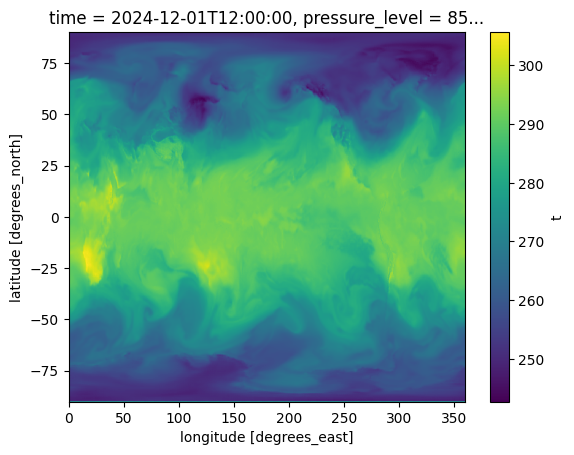

In [16]:
new_ds['t'].isel(time=1, pressure_level=2).plot()

In [18]:
new_ds.to_netcdf("/discover/nobackup/projects/QEFM/data/rollout_outputs/FMPangu/2024-12-01-atmospheric-predicted-60-step.nc")